Learn from # https://github.com/HanXiaoyang/Kaggle_Titanic/blob/master/Titanic.ipynb

pandas加载数据

In [15]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

+ PassengerID: 乘客ID
+ Pclass: 乘客等级，1/2/3等舱位
+ Name: 乘客姓名
+ Sex: 乘客性别
+ Age: 年龄
+ SibSp: 堂兄弟/姐妹个数
+ ParCh: 父母/小孩个数
+ Ticket: 船票信息
+ Fare: 票价
+ Cabin: 具体舱位
+ Embarked: 登船港口

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
print(data_train.ix[0:10,:]) # 显示数据前十行信息

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6        

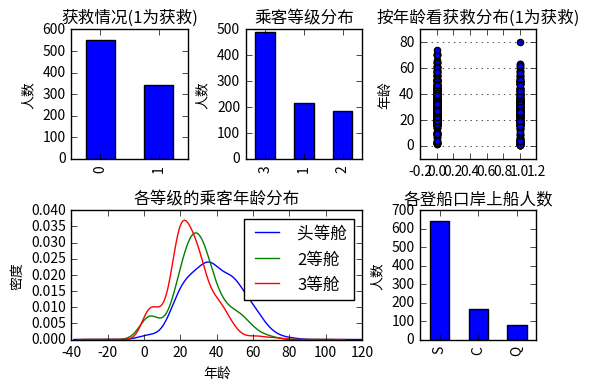

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2) #图标透明度
plt.subplots_adjust(wspace=0.5, hspace=0.4)

plt.subplot2grid((2,3),(0,0)) # 一张大图分成6部分
# plots a bar graph of those who surived vs those who did not
data_train.Survived.value_counts().plot(kind='bar') 
plt.title("获救情况(1为获救)") # a title on the graph
plt.ylabel("人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title("乘客等级分布")
plt.ylabel("人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄")
plt.grid(b=True, which='major', axis='y') # formats the grid line style of out graphs
plt.title("按年龄看获救分布(1为获救)")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passanger's age
data_train.Age[data_train.Pclass == 1].plot(kind='kde') 
data_train.Age[data_train.Pclass == 2].plot(kind='kde') 
data_train.Age[data_train.Pclass == 3].plot(kind='kde') 
plt.xlabel("年龄")# plots an axis lable
plt.ylabel("密度") 
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱', '2等舱','3等舱'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数") 

plt.show()

3    372
2     97
1     80
Name: Pclass, dtype: int64
1    136
3    119
2     87
Name: Pclass, dtype: int64


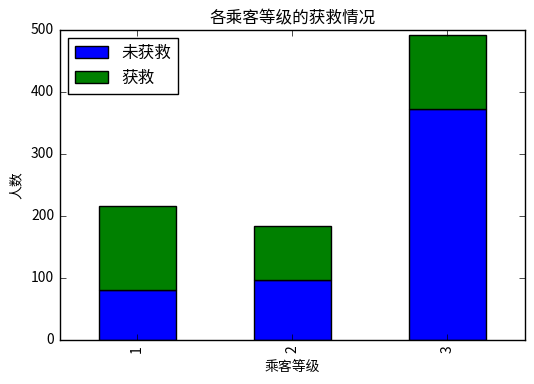

In [26]:
#不同乘客等级获救的情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
print(Survived_0)
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
print(Survived_1)
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

3    144
1     94
2     76
Name: Pclass, dtype: int64
3    347
1    122
2    108
Name: Pclass, dtype: int64


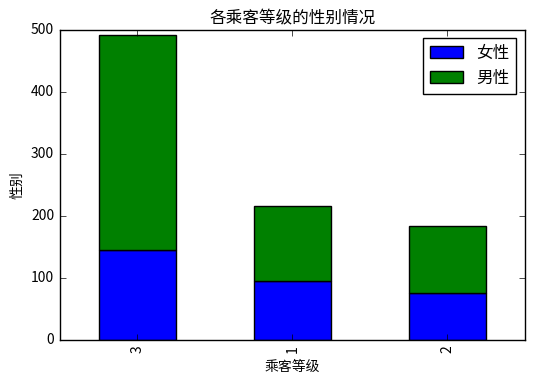

In [25]:
#不同乘客等级性别情况 
# 结合上图可以知道，头等舱的男性还是很多获救了的啊！
fig = plt.figure()
fig.set(alpha=0.2)

Sex_0 = data_train.Pclass[data_train.Sex == 'female'].value_counts()
print(Sex_0)
Sex_1 = data_train.Pclass[data_train.Sex == 'male'].value_counts()
print(Sex_1)
df=pd.DataFrame({u'男性':Sex_1, u'女性':Sex_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的性别情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"性别") 

plt.show()

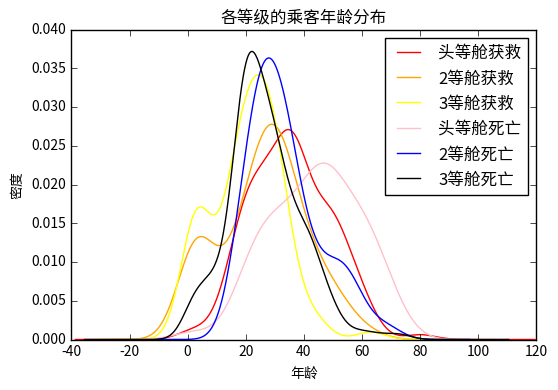

In [14]:
#不同舱级别获救情况的年龄分布
fig = plt.figure()
fig.set(alpha=0.2)

data_train.Age[data_train.Pclass == 1][data_train.Survived == 1].plot(kind='kde', color='red') 
data_train.Age[data_train.Pclass == 2][data_train.Survived == 1].plot(kind='kde', color='orange') 
data_train.Age[data_train.Pclass == 3][data_train.Survived == 1].plot(kind='kde', color='yellow') 
data_train.Age[data_train.Pclass == 1][data_train.Survived == 0].plot(kind='kde', color='pink') 
data_train.Age[data_train.Pclass == 2][data_train.Survived == 0].plot(kind='kde', color='blue') 
data_train.Age[data_train.Pclass == 3][data_train.Survived == 0].plot(kind='kde', color='black') 
plt.xlabel("年龄")# plots an axis lable
plt.ylabel("密度") 
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱获救', '2等舱获救','3等舱获救','头等舱死亡', '2等舱死亡','3等舱死亡'),loc='best') # sets our legend for our graph.

plt.show()

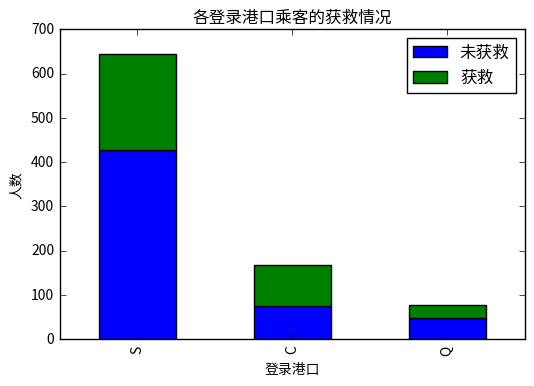

In [9]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()